In [1]:

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import time

In [3]:
import PIL.Image
from PIL import Image


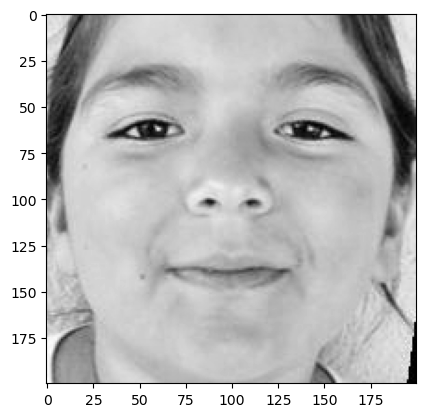

In [4]:
data_dir = 'J:/Users/data_set'
categories = ['5-10', '11-15', '16-18', '19-25', '26-30', '31-40', '41-52', '53-62', '63-78']

for category in categories:
    path = os.path.join(data_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [5]:
print(img_array)
print(img_array.shape)

[[211 213 207 ... 222 222 223]
 [208 210 209 ... 221 221 221]
 [209 209 210 ... 220 221 221]
 ...
 [240 237 208 ...  13   0   0]
 [239 238 216 ...   0   7   5]
 [231 238 224 ...   2   0   0]]
(200, 200)


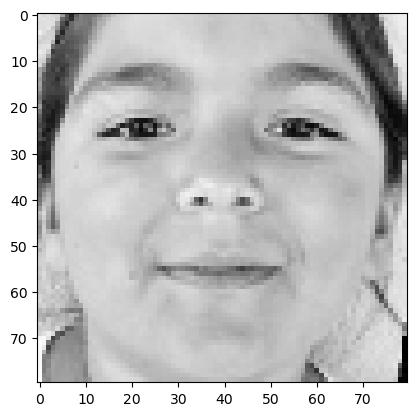

In [6]:
IMG_SIZE = 80
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()


# Process 2

In [7]:
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
        
create_training_data()
        

In [8]:
print(len(training_data))

7461


In [9]:
import random

random.shuffle(training_data)


In [10]:
for sample in training_data[:10]:
    print(sample[1])

8
8
1
2
3
7
3
7
6
8


# process 3

In [11]:
X=[]
Y=[]

In [12]:
for features, label in training_data:
    X.append(features)
    Y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y = np.array(Y)

In [13]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

In [14]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [15]:

NAME = 'AGE-64x2-CNN'

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))


X = pickle.load(open("X.pickle","rb"))
Y = pickle.load(open("Y.pickle","rb"))

X = X/255.0

model = Sequential()

model.add(Conv2D(65, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
''
model.add(Conv2D(65, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
model.fit(X, Y, validation_split=0.2, epochs=5, batch_size=32, callbacks = [tensorboard] )







Epoch 1/5
187/187 [==============================] - 227s 1s/step - loss: -19211284.0000 - accuracy: 0.0700 - val_loss: -115480184.0000 - val_accuracy: 0.0710
Epoch 2/5
187/187 [==============================] - 223s 1s/step - loss: -903090240.0000 - accuracy: 0.0700 - val_loss: -2617151488.0000 - val_accuracy: 0.0710
Epoch 3/5
187/187 [==============================] - 250s 1s/step - loss: -7037906432.0000 - accuracy: 0.0700 - val_loss: -14475030528.0000 - val_accuracy: 0.0710
Epoch 4/5
187/187 [==============================] - 225s 1s/step - loss: -27143987200.0000 - accuracy: 0.0700 - val_loss: -46552780800.0000 - val_accuracy: 0.0710
Epoch 5/5
187/187 [==============================] - 231s 1s/step - loss: -73076137984.0000 - accuracy: 0.0700 - val_loss: -112390242304.0000 - val_accuracy: 0.0710


In [ ]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("Y.pickle","rb")
Y = pickle.load(pickle_in)

X = X/255.0

dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, Y,
                      batch_size=64,
                      epochs=3,
                      validation_split=0.2,
                      callbacks=[tensorboard])

model.save('64x3-CNN.model')